# Case Study
King Matthew Ochoa

Applied Machine Learning

In [1]:
#importing libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics
import numpy as np
import pickle
import seaborn as sns

In [2]:
#read data
df = pd.read_csv('transactions_train.csv')

In [3]:
#checking data
df.head()

,step,type,amount,nameOrig,oldbalanceOrig,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0


In [4]:
## checking the dataset structure
print('number of the data points is ' + str(df.shape[0]) + ' rows and ' + str(df.shape[1]))
#checking the column names 
print('\n column names are:')
print(df.columns.tolist())
print('\n column types are:')
print(df.dtypes.tolist())

number of the data points is 6351193 rows and 10

 column names are:
['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrig', 'newbalanceOrig', 'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud']

 column types are:
[dtype('int64'), dtype('O'), dtype('float64'), dtype('O'), dtype('float64'), dtype('float64'), dtype('O'), dtype('float64'), dtype('float64'), dtype('int64')]


In [5]:
#inspecting the dataset further
print('the transactions can divided into several types')
df.type.value_counts()

the transactions can divided into several types


CASH_OUT    2233369
PAYMENT     2147832
CASH_IN     1396865
TRANSFER     531817
DEBIT         41310
Name: type, dtype: int64

<AxesSubplot:>

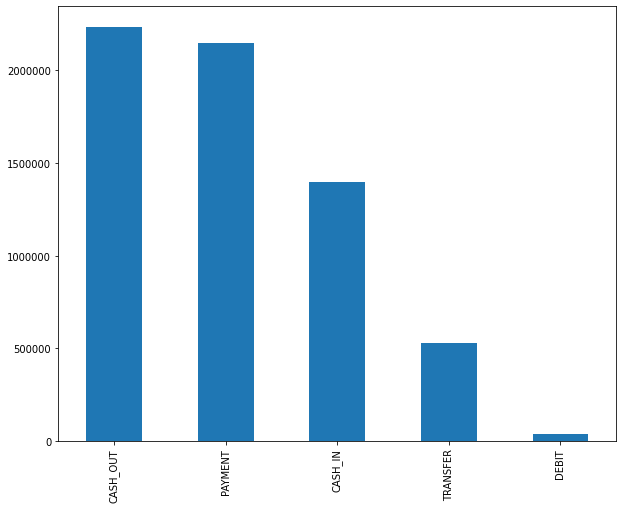

In [6]:
by_types = df['type'].value_counts()
fig, ax = plt.subplots()
ax.ticklabel_format(style='plain')
by_types.plot(kind='bar',figsize=(10,8))

In [7]:
#checking for all transaction, and al
x = df['type'].unique()
y1 = df['type'].value_counts()
y2 = df[df['isFraud']==1]['type'].value_counts()
print(y1)
print(y2)

CASH_OUT    2233369
PAYMENT     2147832
CASH_IN     1396865
TRANSFER     531817
DEBIT         41310
Name: type, dtype: int64
CASH_OUT    3868
TRANSFER    3849
Name: type, dtype: int64


In [8]:
#attaching 
missing_values = {'CASH_IN':0,'PAYMENT':0,'DEBIT':0, }
S = pd.Series(missing_values)
y2 = y2.append(S)
y2

CASH_OUT    3868
TRANSFER    3849
CASH_IN        0
PAYMENT        0
DEBIT          0
dtype: int64

In [9]:
df[df['isFraud']==1].value_counts()

step  type      amount      nameOrig     oldbalanceOrig  newbalanceOrig  nameDest     oldbalanceDest  newbalanceDest  isFraud
1     CASH_OUT  181.00      C840083671   181.00          0.0             C38997010    21182.00        0.00            1          1
463   CASH_OUT  219300.76   C1410654808  219300.76       0.0             C1763889280  19058370.95     19277671.71     1          1
461   CASH_OUT  125153.57   C1856719659  125153.57       0.0             C1226867237  7517.14         132670.71       1          1
460   TRANSFER  2059980.16  C1506089450  2059980.16      0.0             C1564280287  0.00            0.00            1          1
                1424002.70  C777622163   1424002.70      0.0             C413417554   0.00            0.00            1          1
                                                                                                                                ..
228   TRANSFER  2874626.02  C1926697362  2874626.02      0.0             C443920202   0.

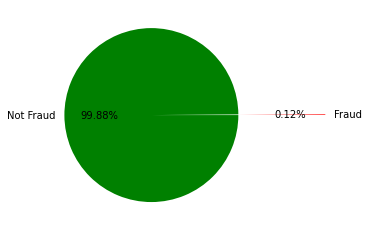

In [10]:
mylabels = ["Fraud", "Not Fraud"]
plt.pie([df[df['isFraud']==1].shape[0], df[df['isFraud']==0].shape[0]],
 labels = mylabels,
 explode = [1, 0],
 colors = ['red','green'],
 autopct='%.2f%%')
plt.show()


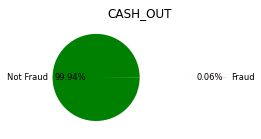

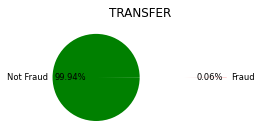

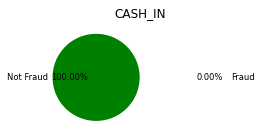

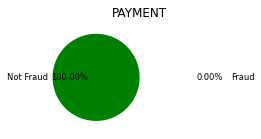

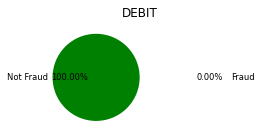

In [11]:
types = ['CASH_OUT','TRANSFER','CASH_IN','PAYMENT','DEBIT']
i = 1;
for type in types:
 plt.figure(figsize=(16, 8))
 plt.subplot(1, 7, i)
 i += 1
 plt.pie([df[(df['isFraud']==1) & (df['type']==type)].shape[0],
 df[df['isFraud']==0 & (df['type']==type)].shape[0]],
 labels = mylabels,
 explode = [1, 1],
 textprops={'size': 'small'},
 colors = ['red','green'],
 autopct='%.2f%%')
 plt.title(type)
 plt.show()

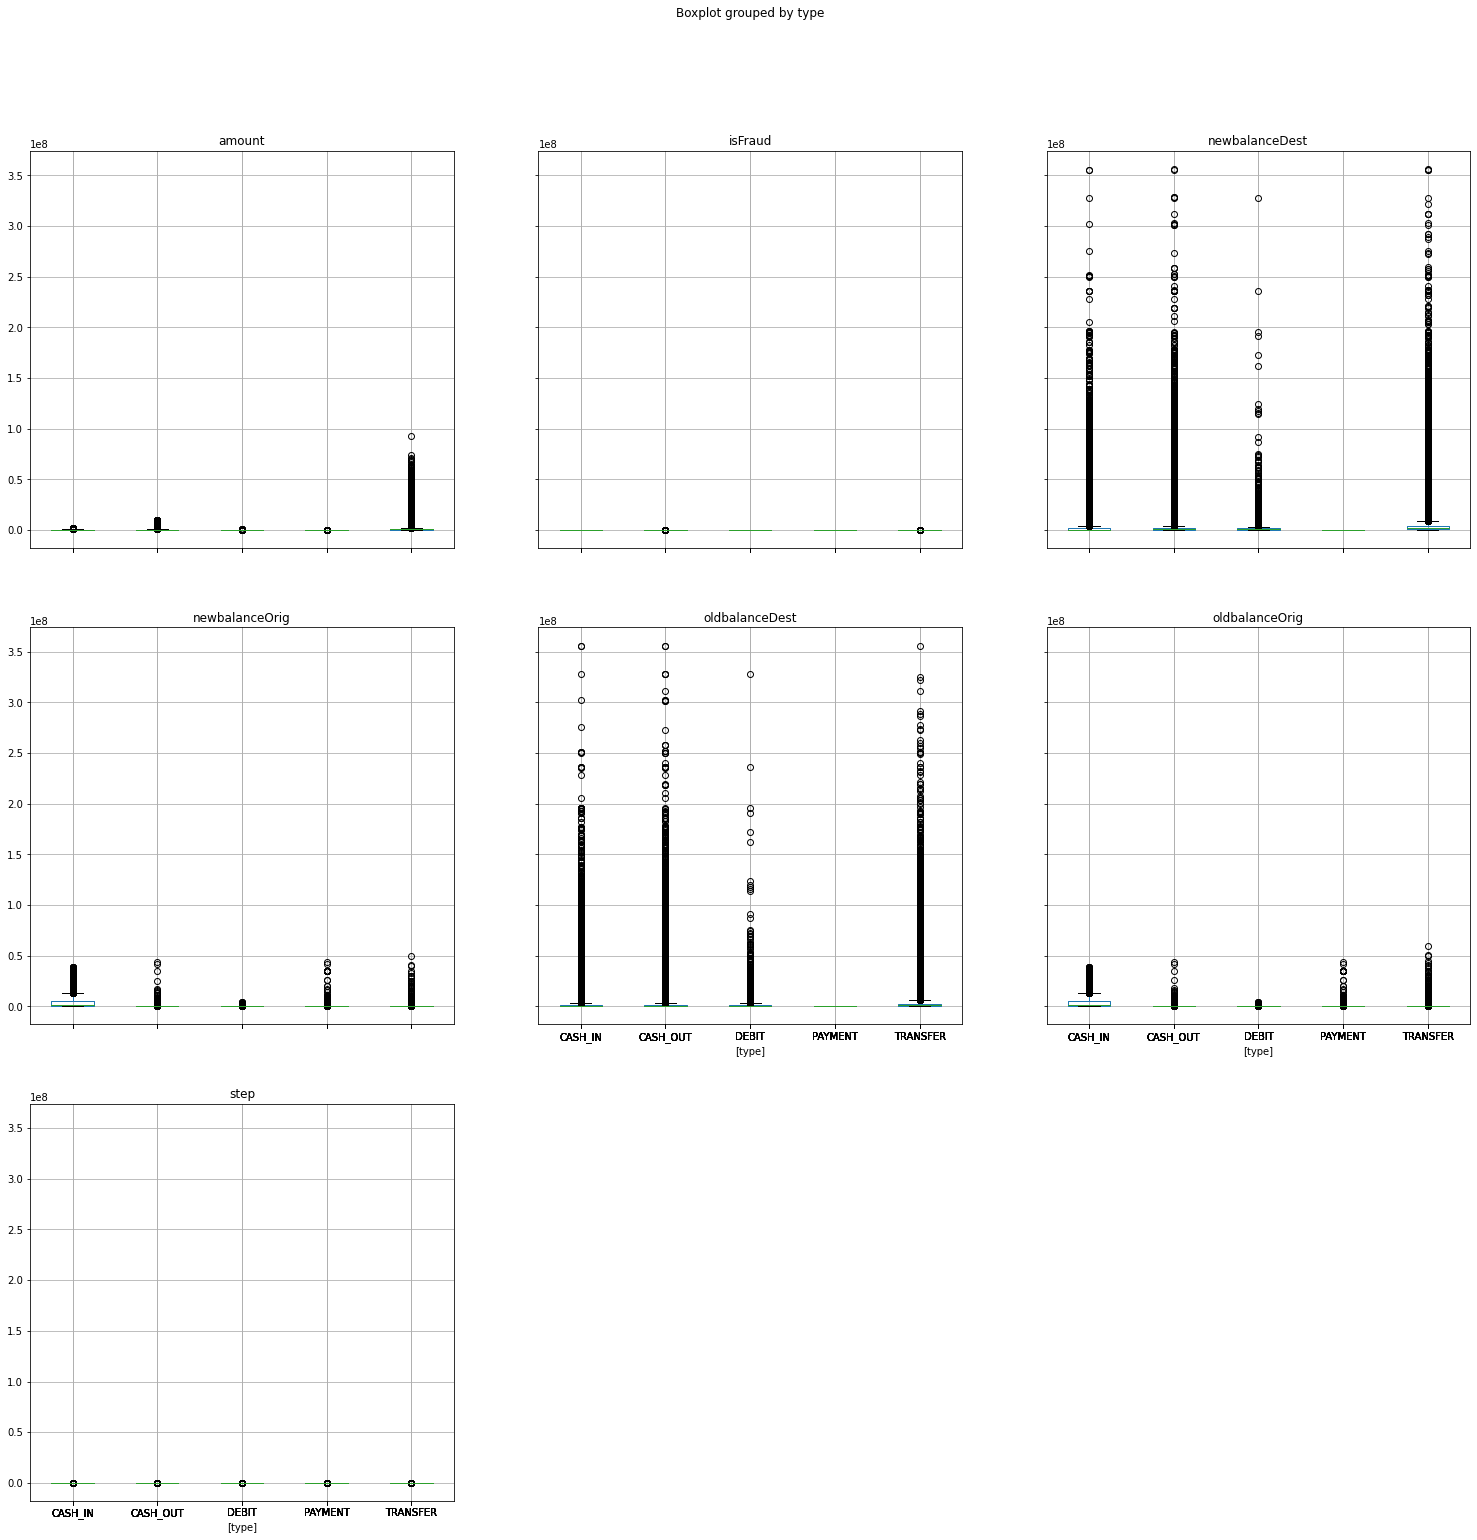

In [12]:
#boxplot
df.boxplot(by='type', figsize= (25,25));

In [13]:
#checking the central tendencies of the data
df.describe()

,step,amount,oldbalanceOrig,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
count,6.351193e+06,6.351193e+06,6.351193e+06,6.351193e+06,6.351193e+06,6.351193e+06,6.351193e+06
mean,2.425553e+02,1.798155e+05,8.347957e+05,8.561696e+05,1.101043e+06,1.225372e+06,1.215047e-03
std,1.410676e+02,6.036310e+05,2.889959e+06,2.926073e+06,3.398924e+06,3.674293e+06,3.483635e-02
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.550000e+02,1.338829e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.380000e+02,7.486483e+04,1.415300e+04,0.000000e+00,1.330865e+05,2.149190e+05,0.000000e+00
75%,3.340000e+02,2.087152e+05,1.073460e+05,1.443651e+05,9.438661e+05,1.112791e+06,0.000000e+00
max,6.990000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00


In [14]:
# Checking the average value per type
df.groupby('type').mean()

,step,amount,oldbalanceOrig,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
type,,,,,,,
CASH_IN,243.684008,168932.556168,3.595239e+06,3.764167e+06,1.588269e+06,1.467434e+06,0.000000
CASH_OUT,240.030399,176114.346385,4.582029e+04,1.747357e+04,1.498099e+06,1.691539e+06,0.001732
DEBIT,247.069354,5487.557117,6.859559e+04,6.511079e+04,1.490370e+06,1.510284e+06,0.000000
PAYMENT,243.581284,13057.864411,6.822245e+04,6.184736e+04,0.000000e+00,0.000000e+00,0.000000
TRANSFER,245.699716,910963.896496,5.300069e+04,9.613766e+03,2.570362e+06,3.558642e+06,0.007237


In [15]:
#checking the median value per type
df.groupby('type').median()

,step,amount,oldbalanceOrig,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
type,,,,,,,
CASH_IN,240.0,143426.010,1206685.34,1375671.93,547477.940,386215.580,0.0
CASH_OUT,236.0,147069.010,544.00,0.00,488729.590,688201.770,0.0
DEBIT,252.0,3048.665,20812.10,16577.11,424060.225,439058.525,0.0
PAYMENT,241.0,9481.795,10516.00,0.00,0.000,0.000,0.0
TRANSFER,249.0,486619.840,0.00,0.00,1018161.990,1728476.560,0.0


In [16]:
#cleaning the dataframe, discarding the unnecessary features, treating the categorical dat
df.head()

,step,type,amount,nameOrig,oldbalanceOrig,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0


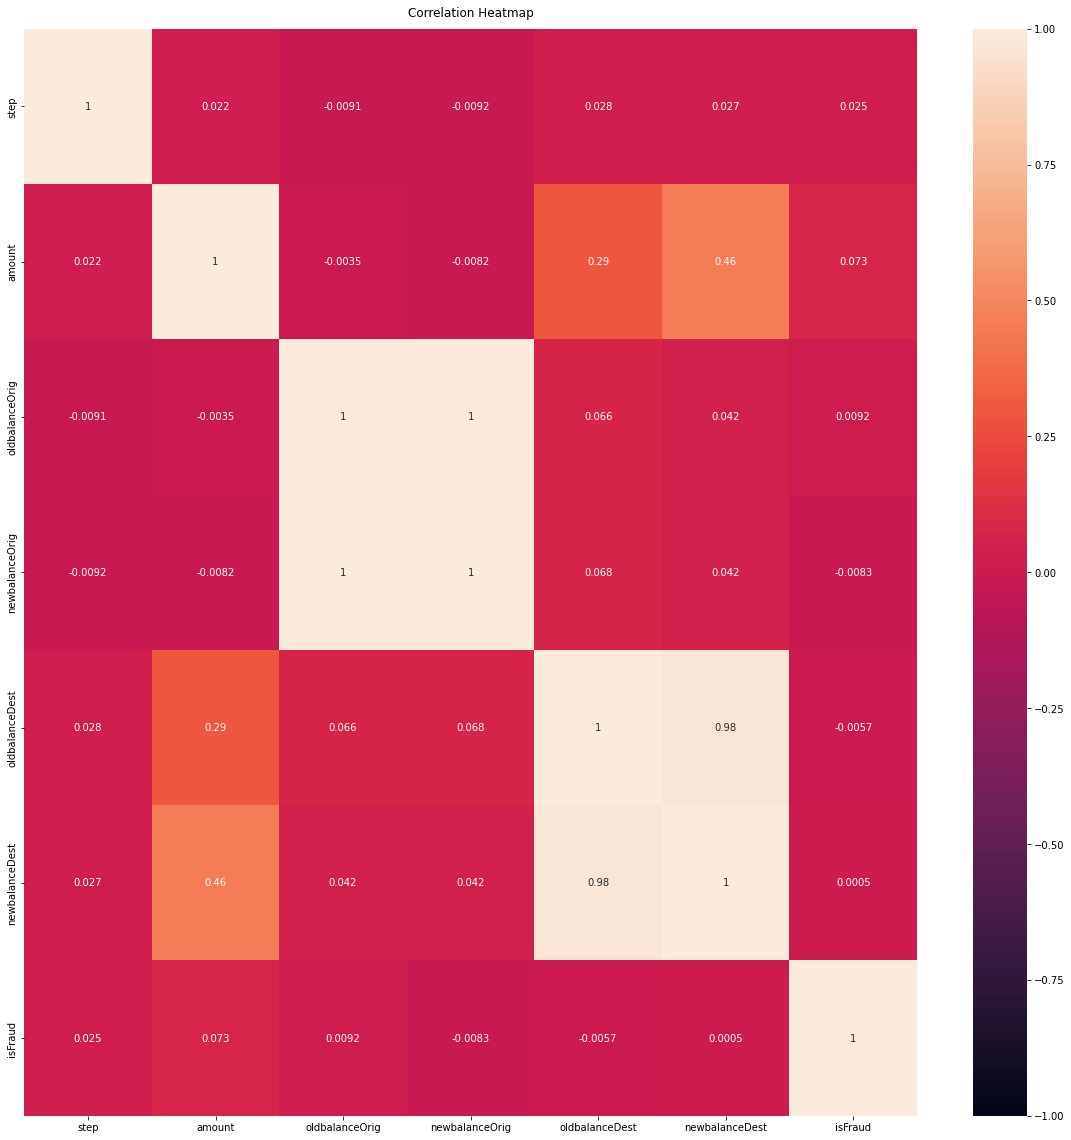

In [17]:
plt.figure(figsize=(20, 20))
#remove uncessary columns
updated_df = df.drop(['nameOrig', 'nameDest'], axis = 1)
heatmap = sns.heatmap(updated_df.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

#treat categorical data
updt_df = pd.get_dummies(updated_df)

In [18]:
#get all the values where types are 'CASH_OUT' and 'TRANSFER' since they are the transactions only with fraudulent transactions
updt_df.dtypes

step                int64
amount            float64
oldbalanceOrig    float64
newbalanceOrig    float64
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
type_CASH_IN        uint8
type_CASH_OUT       uint8
type_DEBIT          uint8
type_PAYMENT        uint8
type_TRANSFER       uint8
dtype: object

In [19]:
updt_df_train_test = updt_df[(updt_df['type_CASH_OUT']==1) | (updt_df['type_TRANSFER'] == 1)]
updt_df_train_test

,step,amount,oldbalanceOrig,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
2,1,181.00,181.00,0.0,0.00,0.00,1,0,0,0,0,1
3,1,181.00,181.00,0.0,21182.00,0.00,1,0,1,0,0,0
15,1,229133.94,15325.00,0.0,5083.00,51513.44,0,0,1,0,0,0
19,1,215310.30,705.00,0.0,22425.00,0.00,0,0,0,0,0,1
24,1,311685.89,10835.00,0.0,6267.00,2719172.89,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
6351186,699,62372.43,62372.43,0.0,1195387.47,1257759.90,1,0,1,0,0,0
6351188,699,162326.52,162326.52,0.0,0.00,0.00,1,0,0,0,0,1
6351189,699,162326.52,162326.52,0.0,0.00,162326.52,1,0,1,0,0,0
6351190,699,2763398.31,2763398.31,0.0,0.00,0.00,1,0,0,0,0,1


In [58]:
updt_df_train_test[updt_df_train_test['isFraud'] == 1].count()/updt_df_train_test.count() * 100

step              0.279077
amount            0.279077
oldbalanceOrig    0.279077
newbalanceOrig    0.279077
oldbalanceDest    0.279077
newbalanceDest    0.279077
isFraud           0.279077
type_CASH_IN      0.279077
type_CASH_OUT     0.279077
type_DEBIT        0.279077
type_PAYMENT      0.279077
type_TRANSFER     0.279077
originError       0.279077
destError         0.279077
dtype: float64

In [20]:
updt_df_train_test['originError'] = updt_df_train_test['oldbalanceOrig']-(updt_df_train_test['amount']+updt_df_train_test['newbalanceOrig'])
updt_df_train_test['destError'] = updt_df_train_test['oldbalanceDest']-(updt_df_train_test['newbalanceDest']+updt_df_train_test['amount'])

C:\Users\Shiyuh\AppData\Local\Temp/ipykernel_29656/3028243359.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  updt_df_train_test['originError'] = updt_df_train_test['oldbalanceOrig']-(updt_df_train_test['amount']+updt_df_train_test['newbalanceOrig'])
C:\Users\Shiyuh\AppData\Local\Temp/ipykernel_29656/3028243359.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  updt_df_train_test['destError'] = updt_df_train_test['oldbalanceDest']-(updt_df_train_test['newbalanceDest']+updt_df_train_test['amount'])


In [22]:
y = updt_df_train_test.isFraud
df_dependent = updt_df_train_test.drop(['oldbalanceOrig','oldbalanceDest','isFraud','type_CASH_IN','type_CASH_OUT','type_DEBIT','type_PAYMENT','type_TRANSFER'], axis =1)
df_dependent

,step,amount,newbalanceOrig,newbalanceDest,originError,destError
2,1,181.00,0.0,0.00,0.00,-181.00
3,1,181.00,0.0,0.00,0.00,21001.00
15,1,229133.94,0.0,51513.44,-213808.94,-275564.38
19,1,215310.30,0.0,0.00,-214605.30,-192885.30
24,1,311685.89,0.0,2719172.89,-300850.89,-3024591.78
...,...,...,...,...,...,...
6351186,699,62372.43,0.0,1257759.90,0.00,-124744.86
6351188,699,162326.52,0.0,0.00,0.00,-162326.52
6351189,699,162326.52,0.0,162326.52,0.00,-324653.04
6351190,699,2763398.31,0.0,0.00,0.00,-2763398.31


In [23]:
#normalize values
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df_dependent)
scaled_data = scaler.transform(df_dependent)
scaled_data

array([[-1.71182515, -0.35748584, -0.11431975, -0.43839253,  0.32670344,
         0.33174564],
       [-1.71182515, -0.35748584, -0.11431975, -0.43839253,  0.32670344,
         0.34233534],
       [-1.71182515, -0.09950687, -0.11431975, -0.42737977,  0.08264075,
         0.19407079],
       ...,
       [ 3.26422929, -0.17478395, -0.11431975, -0.40368969,  0.32670344,
         0.16952946],
       [ 3.26422929,  2.75604462, -0.11431975, -0.43839253,  0.32670344,
        -1.04969401],
       [ 3.26422929,  2.75604462, -0.11431975,  0.22496134,  0.32670344,
        -2.43122414]])

In [24]:
pickle.dump(scaler, open('scaler.pkl','wb'))

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(scaled_data, y)

### Logistic Regression

In [26]:
from sklearn.linear_model import LogisticRegression 
lr = LogisticRegression(solver='liblinear')

In [27]:
lr.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

In [28]:
pred_lr = lr.predict(X_test)

In [29]:
print("accuracy",metrics.accuracy_score(y_test,y_pred=pred_lr))
print("precision",metrics.precision_score(y_test,y_pred = pred_lr))
print("f1 score",metrics.f1_score(y_test,y_pred = pred_lr))
print("recall",metrics.recall_score(y_test, y_pred = pred_lr))
print(metrics.classification_report(y_test, y_pred = pred_lr))

accuracy 0.9983972156685187
precision 0.9255765199161425
f1 score 0.6144745998608211
recall 0.45989583333333334
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    689377
           1       0.93      0.46      0.61      1920

    accuracy                           1.00    691297
   macro avg       0.96      0.73      0.81    691297
weighted avg       1.00      1.00      1.00    691297



In [30]:
#save model
filename = 'lr.pkl'
pickle.dump(lr, open(filename, 'wb'))

### Support Vector Machine

In [31]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train, y_train)

SVC()

In [32]:
pred_svm = svc.predict(X_test)

In [33]:
print("accuracy",metrics.accuracy_score(y_test,y_pred=pred_svm))
print("precision",metrics.precision_score(y_test,y_pred = pred_svm))
print("f1 score",metrics.f1_score(y_test,y_pred = pred_svm))
print("recall",metrics.recall_score(y_test, y_pred = pred_svm))
print(metrics.classification_report(y_test, y_pred = pred_svm))

accuracy 0.9985028142751957
precision 0.9804560260586319
f1 score 0.6356916578669483
recall 0.4703125
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    689377
           1       0.98      0.47      0.64      1920

    accuracy                           1.00    691297
   macro avg       0.99      0.74      0.82    691297
weighted avg       1.00      1.00      1.00    691297



In [34]:
#save model
filename = 'svm.pkl'
pickle.dump(svc, open(filename, 'wb'))

### Decision Tree

In [35]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
dtc = DecisionTreeClassifier()
dtc.fit(X_train,y_train)

DecisionTreeClassifier()

In [36]:
pred_dtc = dtc.predict(X_test)

In [37]:
print("accuracy",metrics.accuracy_score(y_test,y_pred=pred_dtc))
print("precision",metrics.precision_score(y_test,y_pred = pred_dtc))
print("f1 score",metrics.f1_score(y_test,y_pred = pred_dtc))
print("recall",metrics.recall_score(y_test, y_pred = pred_dtc))
print(metrics.classification_report(y_test, y_pred = pred_dtc))

accuracy 0.9999768550999064
precision 0.9958333333333333
f1 score 0.9958333333333333
recall 0.9958333333333333
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    689377
           1       1.00      1.00      1.00      1920

    accuracy                           1.00    691297
   macro avg       1.00      1.00      1.00    691297
weighted avg       1.00      1.00      1.00    691297



In [38]:
#save model
filename = 'dtc.pkl'
pickle.dump(dtc, open(filename, 'wb'))

### Random Forest 

In [39]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 200)

In [40]:
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200)

In [41]:
pred_rf = rf.predict(X_test)

In [42]:
print("accuracy",metrics.accuracy_score(y_test,y_pred=pred_rf))
print("precision",metrics.precision_score(y_test,y_pred = pred_rf))
print("f1 score",metrics.f1_score(y_test,y_pred = pred_rf))
print("recall",metrics.recall_score(y_test, y_pred = pred_rf))
print(metrics.classification_report(y_test, y_pred = pred_rf))

accuracy 0.9999884275499532
precision 1.0
f1 score 0.9979123173277662
recall 0.9958333333333333
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    689377
           1       1.00      1.00      1.00      1920

    accuracy                           1.00    691297
   macro avg       1.00      1.00      1.00    691297
weighted avg       1.00      1.00      1.00    691297



In [43]:
#save model
filename = 'rf.pkl'
pickle.dump(rf, open(filename, 'wb'))

### Naive Bayes

In [48]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

In [49]:
y_pred_gnb = gnb.predict(X_test)

In [50]:
print("accuracy",metrics.accuracy_score(y_test,y_pred=y_pred_gnb))
print("precision",metrics.precision_score(y_test,y_pred = y_pred_gnb))
print("f1 score",metrics.f1_score(y_test,y_pred = y_pred_gnb))
print("recall",metrics.recall_score(y_test, y_pred = y_pred_gnb))
print(metrics.classification_report(y_test, y_pred = y_pred_gnb))

accuracy 0.9907883297627503
precision 0.046677537708927845
f1 score 0.06709639613243482
recall 0.11927083333333334
              precision    recall  f1-score   support

           0       1.00      0.99      1.00    689377
           1       0.05      0.12      0.07      1920

    accuracy                           0.99    691297
   macro avg       0.52      0.56      0.53    691297
weighted avg       0.99      0.99      0.99    691297



In [54]:
#save model
filename = 'gnb.pkl'
pickle.dump(gnb, open(filename, 'wb'))